In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [17]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21/fitlist_asas-rcb-21-fine', sep=' ')

In [32]:
rats = np.linspace(3.7,7.3,37
                   )
rats = np.repeat(rats, 5)
rats

array([3.7, 3.7, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9,
       3.9, 3.9, 4. , 4. , 4. , 4. , 4. , 4.1, 4.1, 4.1, 4.1, 4.1, 4.2,
       4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.3, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4,
       4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7,
       4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9,
       5. , 5. , 5. , 5. , 5. , 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2,
       5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.4, 5.4, 5.5,
       5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.7,
       5.7, 5.8, 5.8, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 5.9, 5.9, 6. , 6. ,
       6. , 6. , 6. , 6.1, 6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.2, 6.2,
       6.3, 6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5,
       6.5, 6.5, 6.6, 6.6, 6.6, 6.6, 6.6, 6.7, 6.7, 6.7, 6.7, 6.7, 6.8,
       6.8, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 6.9, 6.9, 7. , 7. , 7. , 7. ,
       7. , 7.1, 7.1, 7.1, 7.1, 7.1, 7.2, 7.2, 7.2, 7.2, 7.2, 7.

In [33]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(O),A(Na),A(S),A(Fe),A(Mg),A(Si),A(N),oisorat
0,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
1,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
2,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
3,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
4,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,7.3
181,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,7.3
182,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,7.3
183,ASAS-RCB-21.txt,0.0,5750.0,0.5,0.0,7.5,7.5,11.5,9.5,8.8,5.29,6.16,7.5,6.55,6.59,9.416,7.3


In [34]:
# fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21/fitlist_asas-rcb-21-fine2', sep=' ', index=False)

In [11]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21/Sep-30-2024-03-10-02_3.5-7.2_x5/output'
df1 = pd.read_csv(allpath, sep='\t')
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21/Sep-30-2024-05-51-39_2.4-3.4_x5/output'
df2 = pd.read_csv(allpath, sep='\t')

In [12]:
df_fine = pd.concat([df1,df2])
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [13]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

4.38 -1.19 1.83


Text(0.5, 0, '16O/18O ratio')

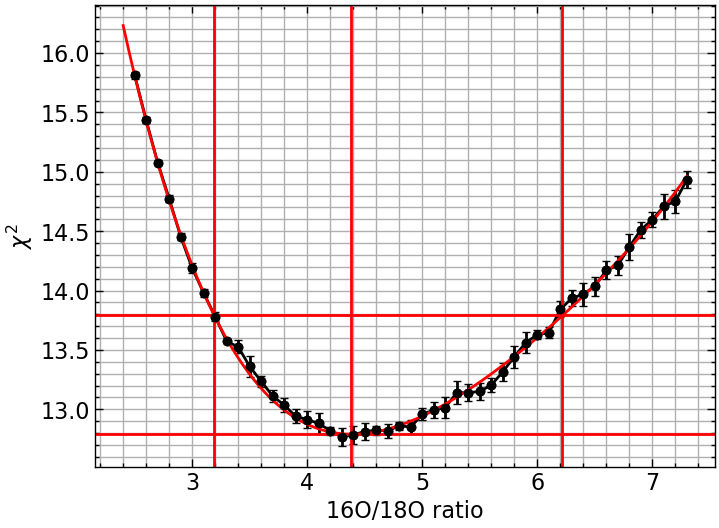

In [49]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(2.4,7.3,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


In [50]:
o16rats = rats/(1+rats)
o16s =  (8.77 + np.array(oabunds)) + np.log(o16rats)

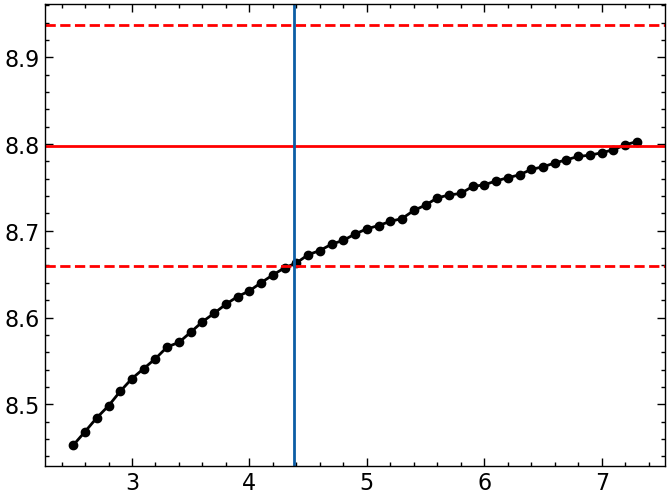

In [52]:
plt.plot(rats, o16s, 'ko-')
# plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
plt.axhline(8.798, ls='-', color='r')
plt.axhline(8.798-0.139, ls='--', color='r')
plt.axhline(8.798+0.139, ls='--', color='r')
plt.axvline(4.38)